### Polar rectify main program

In [499]:
import numpy as np
import math
from matplotlib import pyplot as plt
import cv2
from scipy import ndimage

isPlot=True

def imgWrapA(orgImg,a):
    img_a = ndimage.rotate(orgImg, a, reshape=False)    
    return img_a

def estCorrect_deepracer(orgImg, color=1):
    wh=max(orgImg.shape)
    
    print('wh=',wh)
    print(orgImg[0:int(wh/4), int(wh/2),color])
    maxIndex=np.argmax(orgImg[0:int(wh/4), int(wh/2),color])
    #maxIndex_list=np.argsort(orgImg[0:int(wh/4), int(wh/2),color])
    avgDists=np.array(orgImg[0:int(wh/2), int(wh/2),color])*1.0
    maxIndex_list=(avgDists).argsort()
    maxIndex_list_minus=(-avgDists).argsort()
    #.argpartition(2)[:2]
    usedArray=[]

    print('maxIndex=',maxIndex, 'maxIndex_list=', maxIndex_list, 'maxIndex_list_minus=', maxIndex_list_minus)
    #pix_color = np.array(orgImg[maxIndex:maxIndex+int(wh/2),:])
    pix_color = np.array(orgImg[maxIndex_list_minus[0]:maxIndex_list_minus[0]+int(wh/2),:])
    usedArray.append(maxIndex_list_minus[0]-2)
    usedArray.append(maxIndex_list_minus[0]-1)
    usedArray.append(maxIndex_list_minus[0])
    usedArray.append(maxIndex_list_minus[0]+1)
    usedArray.append(maxIndex_list_minus[0]+2)
    print(usedArray)
    for i in range(3):
        if maxIndex_list_minus[i] not in usedArray:
            pix_color_1 = np.array(orgImg[maxIndex_list_minus[i]:maxIndex_list_minus[i]+int(wh/2),:])
            usedArray.append(maxIndex_list_minus[i]-2)
            usedArray.append(maxIndex_list_minus[i]-1)
            usedArray.append(maxIndex_list_minus[i])
            usedArray.append(maxIndex_list_minus[i]+1)
            usedArray.append(maxIndex_list_minus[i]+2)
            pix_color=pix_color + pix_color_1
            print(usedArray)
    #else :
    #    pix_color_1 = np.array(orgImg[maxIndex_list_minus[2]:maxIndex_list_minus[2]+int(wh/2),:])

    #pix_color=pix_color_0 + pix_color_1

    img=pix_color[:,:,color]
    print(img[0,:])
    img_0_fft=np.fft.fft(img[0,:]*1.0)
    print(np.abs(img_0_fft))
    
    size=min(img.shape)
    print(img[0,size])
    polar_img = cv2.warpPolar(img, (size, 360), (size,0), 
                                  size, cv2.WARP_POLAR_LINEAR)  
    polar_img=polar_img[0:180,:]*1.0
    polar_sum=np.sum(polar_img,axis=1)*1.0
    polar_diff=np.diff(polar_img,axis=1)
    polar_diff_abs=np.abs(polar_diff)
    #print(polar_diff_abs)
    polar_diff_abs_sum=np.sum(polar_diff_abs,axis=1)*1.0
    polar_sum_sub_polar_diff_abs_sum=polar_sum-polar_diff_abs_sum
    polar_sum_div_polar_diff_abs_sum=polar_diff_abs_sum/polar_sum
    #print(polar_diff_abs_sum)


    
    if isPlot:
        maxIndex=np.argmax(polar_sum_sub_polar_diff_abs_sum)
        offsetDegree=(maxIndex)
        print('offsetDegree=', offsetDegree)
        full_pix_color0 = np.array(orgImg)
        correctImg=imgWrapA(full_pix_color0,offsetDegree)
        plt.subplots(1,4,figsize=(15,4))
        plt.subplot(151),plt.imshow(img, cmap = 'gray')
        plt.title('img'), plt.xticks([]), plt.yticks([])
        plt.subplot(152)  ,plt.imshow(polar_img, cmap = 'gray')
        plt.title('polar_img(0,0)'), plt.xticks([]), plt.yticks([])
        plt.subplot(153),plt.plot(polar_sum)
        plt.subplot(153),plt.plot(polar_diff_abs_sum)
        plt.subplot(153),plt.plot(polar_sum_sub_polar_diff_abs_sum)
        #print(polar_sum-min(polar_sum))
        plt.title('polar_sum'), plt.xticks([]), plt.yticks([])
        plt.subplot(154),plt.plot(polar_sum_div_polar_diff_abs_sum)
        #print(polar_sum-min(polar_sum))
        plt.title('polar_sum_div_polar_diff_abs_sum'), plt.xticks([]), plt.yticks([])
        
        plt.subplot(155),plt.imshow(correctImg)
        plt.title('correctImg'), plt.xticks([]), plt.yticks([])
        plt.show()
        
    return polar_sum_sub_polar_diff_abs_sum
    #return polar_diff_abs_sum
    #return polar_sum_div_polar_diff_abs_sum




        



def polarWarp(orgImg_crop128_a33_crop):
    polar_sum_g=estCorrect_deepracer(orgImg_crop128_a33_crop,1)
    polar_sum_b=estCorrect_deepracer(orgImg_crop128_a33_crop,2)
    polar_sum_b_shift=np.roll(polar_sum_b, 90, axis=None)

    
    polar_sum_bg=polar_sum_g+polar_sum_b_shift
    #polar_sum_bg=np.convolve(polar_sum_bg, [1,4,6,4,1], mode='same')

    
    
    maxIndex=np.argmax(polar_sum_bg)
    offsetDegree=(maxIndex)
    print('offsetDegree=', offsetDegree)
    correctImg=imgWrapA(np.array(orgImg_crop128_a33_crop),offsetDegree)
    
    if isPlot:
        plt.subplots(1,2,figsize=(15,4))
        plt.subplot(121)
        plt.plot(range(len(polar_sum_g)), polar_sum_g, label = "polar_sum_g")
        plt.plot(range(len(polar_sum_b_shift)), polar_sum_b_shift, label = "polar_sum_b_shift")
        plt.plot(range(len(polar_sum_bg)), polar_sum_bg/2, label = "polar_sum_bg")
        plt.legend()
        plt.subplot(122),plt.imshow(correctImg)
        plt.title('correctImg'), plt.xticks([]), plt.yticks([])
        plt.show()



        



wh= 64
[ 19   0   0   4   0 131 255 218   8   0  68   0   0   0   0 201]
maxIndex= 6 maxIndex_list= [ 9 23 14 13 12 11 19  4  2  1 28 18  3  8 24  0 29 20 17 10 31 27  5 22
 15  7 25 30 21 26  6 16] maxIndex_list_minus= [26  6 21 16 30 25  7 15 22  5 27 31 10 17 20 29  0 24  8  3 18 19  9 11
  4 23 14  2  1 28 13 12]
[24, 25, 26, 27, 28]
[24, 25, 26, 27, 28, 4, 5, 6, 7, 8]
[24, 25, 26, 27, 28, 4, 5, 6, 7, 8, 19, 20, 21, 22, 23]
[ 14   7  29  17  40   2  62   2   2 152  48 254 254   5   6   2 187 193
  68 187 190   2   0  25  63   8   1  21   1   1 117 197 253 200  50   0
   2  67 236   1 237  20   0   0  75 118 106 180 146   0   0  38 200   1
 176 112   0   6 225 129  91 166 164   0]
[5156.          184.67777221  384.68040247 1217.52019702  703.68977725
  860.97251285  729.68117896  580.7089684   230.11797132 2064.09391174
  488.2520765   189.96364508  572.14837258  333.39699995  418.67869529
  670.38077813  514.95436691  531.84134113 1222.84870318  483.07599495
  363.50018738  291.049

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:84: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


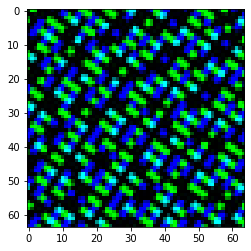

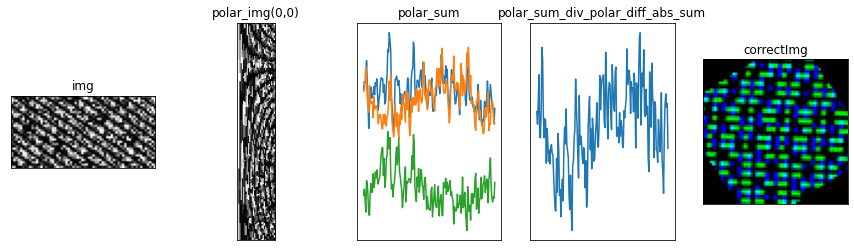

wh= 64
[ 29   0   0   8   0 149 209  30   0   1  61   0  68 186  24   0]
maxIndex= 6 maxIndex_list= [15 29 26 22 19 18 30 11 31  1  2  8  4  9 23 21 25 16 24  3 20 14 28  0
  7 10 12 27 17  5 13  6] maxIndex_list_minus= [ 6 13  5 17 27 12 10  7  0 28 14 20  3 24 25 16 21  9 23 29 22 26 15 18
 30 11  8  4  2  1 19 31]
[4, 5, 6, 7, 8]
[4, 5, 6, 7, 8, 11, 12, 13, 14, 15]
[ 37 182  62 119   0  57 246 255 108   0   1   0  11   8   1  84 156   0
   3   0 214 254 210  28   0 166 126 251   0   0  67 254 139   0   0   0
  61 140   1   7 108   7   0   0  23 248 255 135   0   2  60 255  90   0
 101 255 255  50   0   0   0 206  53   0]
[5351.          124.76366187  814.68386974 1039.41070062  657.69104762
  805.48274778  217.36205205  540.03528564 1356.96098447  227.6998701
 1007.22282971 1056.21329279  278.17416777 2835.12881839  159.21856952
   80.18320634  323.39604203  193.98979947  196.26774662  464.14421434
  247.75857177  895.05915424  173.61669808  415.92606454  486.11406749
  140.3593857 

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:84: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [ ]:
bigMap="img/2018_org_narrow_2.tiff"
orgImg = cv2.cvtColor(cv2.imread(bigMap), cv2.COLOR_BGR2RGB)

#Question
y=100;
x=200;
wh=128
#wh=64
orgImg_crop128=orgImg[y: y + wh, x: x + wh ]
plt.imshow(orgImg_crop128)
a=55
orgImg_crop128_a33=imgWrapA(orgImg_crop128,a)

#Answer
offset=0
orgImg_crop128_a33_crop=orgImg_crop128_a33[int(wh/4)+offset: int(3*wh/4)+offset , int(wh/4): int(3*wh/4)]
plt.imshow(orgImg_crop128_a33_crop)

polarWarp(orgImg_crop128_a33_crop)


    




In [ ]:
print(orgImg_crop128_a33[int(wh/4):int(wh/8*3), int(wh/2),1])

In [ ]:
print(orgImg_crop128_a33[int(wh/4):int(wh/8*3), int(wh/2),2])